# Customer Churn- Exploratory Data Analysis

### The objective of this analysis is to explore customer data to understand factors influencing customer churn and identify patterns that distinguish churned customers from retained customers.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

There are total of 7043 rows and 22 columns/features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are total of 21 columns and none of those contain null values. Some features are categorical whereas some are numeric [Monthly Charges,Tenure, SeniorCitizen].
Churn is target variable

replacing blanks with 0  as tenure is 0 and no total charges are recorded

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


we can observe that target column is biased. Majority of customers did not churn.

##### Missing value analysis

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no missing values in above dataset.

descriptive statistical analysis

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Check for duplicate data

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

Since all the categorical feature are in the form of yes/no except SeniorCitizen column so lets convert it also in same form for now

In [11]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
        
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

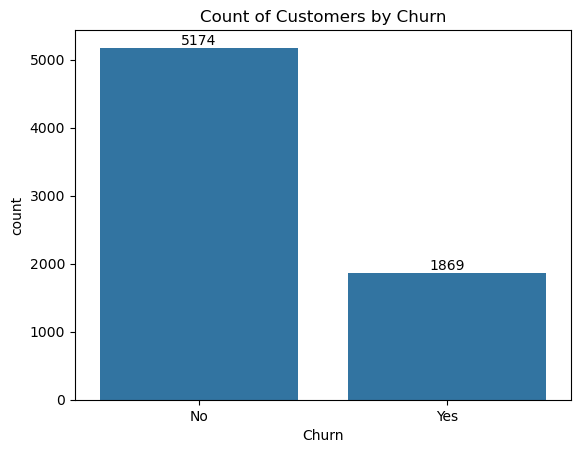

In [14]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

we can see that the target column is biased as majority of customers did not churn.

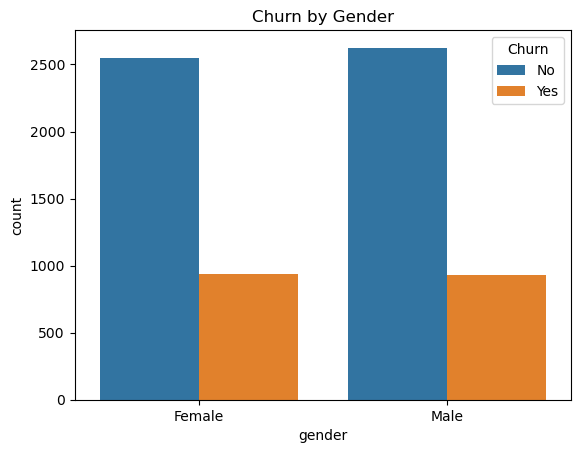

In [15]:
sns.countplot(x='gender',data=df,hue='Churn')
plt.title("Churn by Gender")
plt.show()

We can see that both male and female are almost of same numbers so gender alone don't impact much

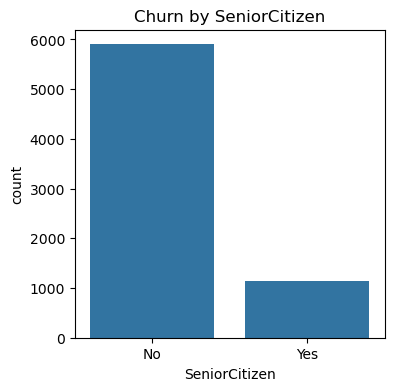

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen',data=df)
plt.title("Churn by SeniorCitizen")
plt.show()

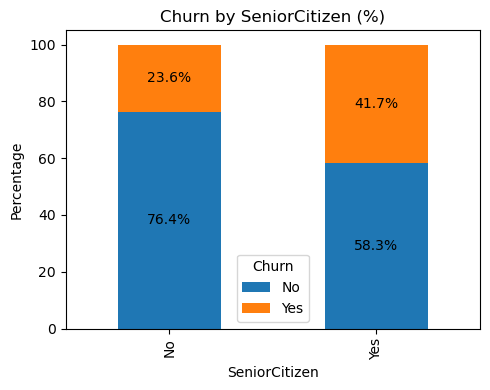

In [17]:
# Create percentage table
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn by SeniorCitizen (%)')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Senior citizens show a higher churn percentage compared to non-senior customers, indicating the need for targeted retention strategies.

In [20]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

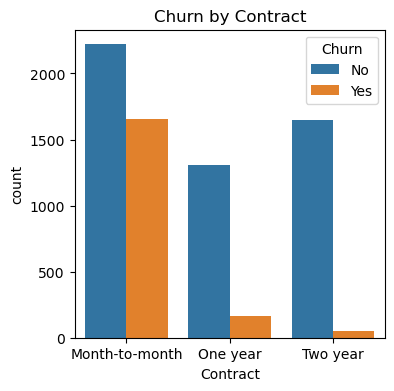

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x='Contract',data=df,hue='Churn')
plt.title("Churn by Contract")
plt.show()

- Customers of month-to-month contract are more likely to churn in compared to ones with one year or two year contract.

In [22]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [23]:
#select categorical columns
cat_cols=df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True)*100)


Column: customerID
customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64

Column: gender
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

Column: SeniorCitizen
SeniorCitizen
No     83.785319
Yes    16.214681
Name: proportion, dtype: float64

Column: Partner
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

Column: Dependents
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

Column: PhoneService
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64

Column: MultipleLines
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

Column: InternetServ

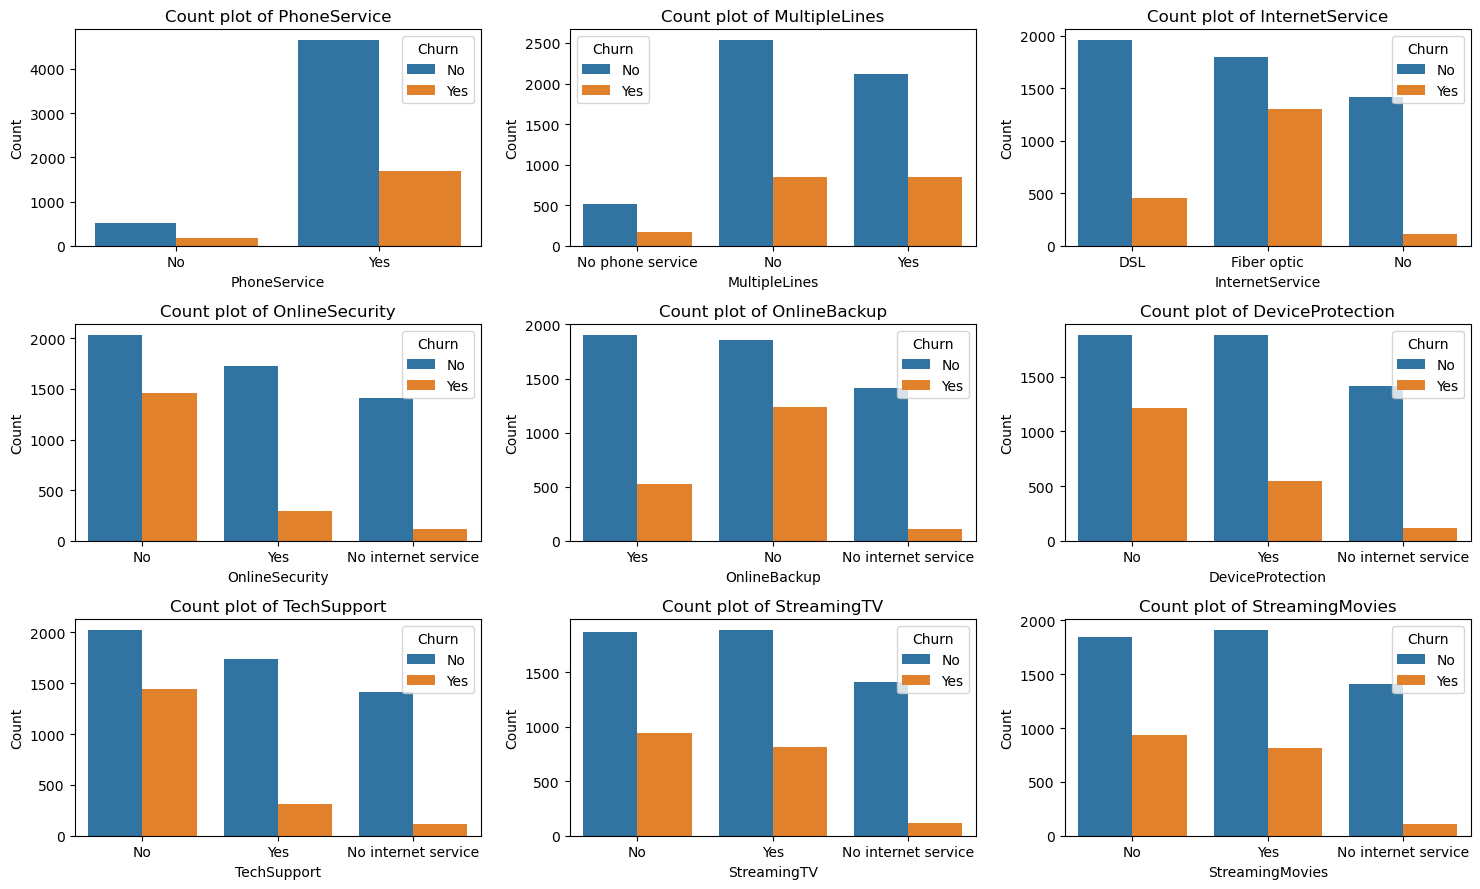

In [24]:
columns = [
    'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(
        x=col,
        hue='Churn',
        data=df,
        ax=axes[i]
    )
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove extra empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

The majority of customers who do not churn tend to have services like PhoneService, InternetService, and OnlineSecurity enabled. For services like OnlineSecurity, DeviceProtection, OnlineBackup, TechSupport, StreamingTV, and StreamingMovies churn rates are noticeably higher when these are not used or unavailable.

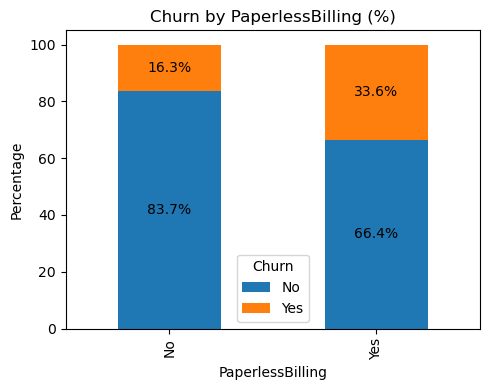

In [28]:
# Create percentage table
ct = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn by PaperlessBilling (%)')
plt.ylabel('Percentage')
plt.xlabel('PaperlessBilling')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- The customer with PaperlessBilling is more likely to churn.

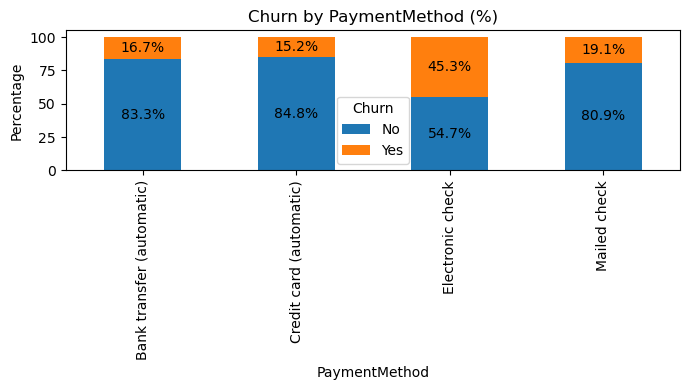

In [32]:
# Create percentage table
ct = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(7,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn by PaymentMethod (%)')
plt.ylabel('Percentage')
plt.xlabel('PaymentMethod')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Customer with ElectronicCheck type of payment is more likely to churn in compared to others

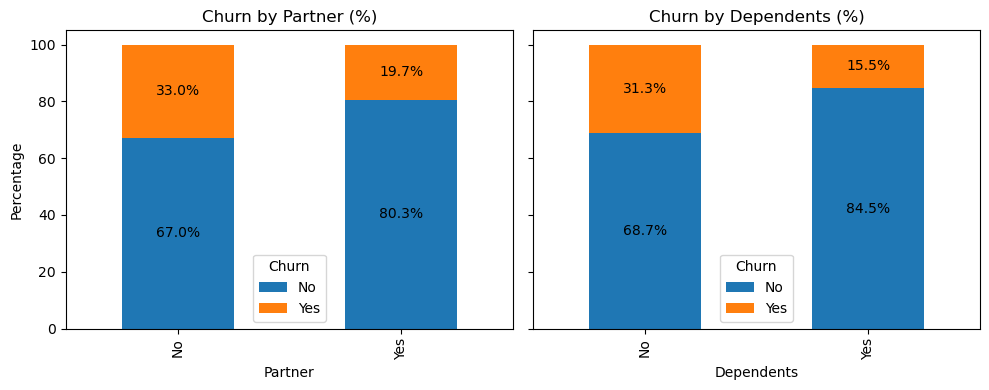

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

cols = ['Partner', 'Dependents']

for i, col in enumerate(cols):
    # Create percentage table
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Plot stacked bar chart
    ax = ct.plot(kind='bar', stacked=True, ax=axes[i])

    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

    ax.set_title(f'Churn by {col} (%)')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.legend(title='Churn')

plt.tight_layout()

- Customers with no partners and no dependents are more likely to churn.
This suggests that customers with family ties tend to stay longer, possibly because they rely more on consistent telecom services and are less price-sensitive.

In [37]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Univariate Analysis of numeric columns

In [69]:
'''
columns=['MonthlyCharges','TotalCharges']
for col in columns:
    plt.figure(figsize=(5,3))
    sns.histplot(x=df[col],kde=True)
    #sns.displot(df,x=col,kde=True)
    plt.title(f'Distribution of {col}')
'''

"\ncolumns=['MonthlyCharges','TotalCharges']\nfor col in columns:\n    plt.figure(figsize=(5,3))\n    sns.histplot(x=df[col],kde=True)\n    #sns.displot(df,x=col,kde=True)\n    plt.title(f'Distribution of {col}')\n"

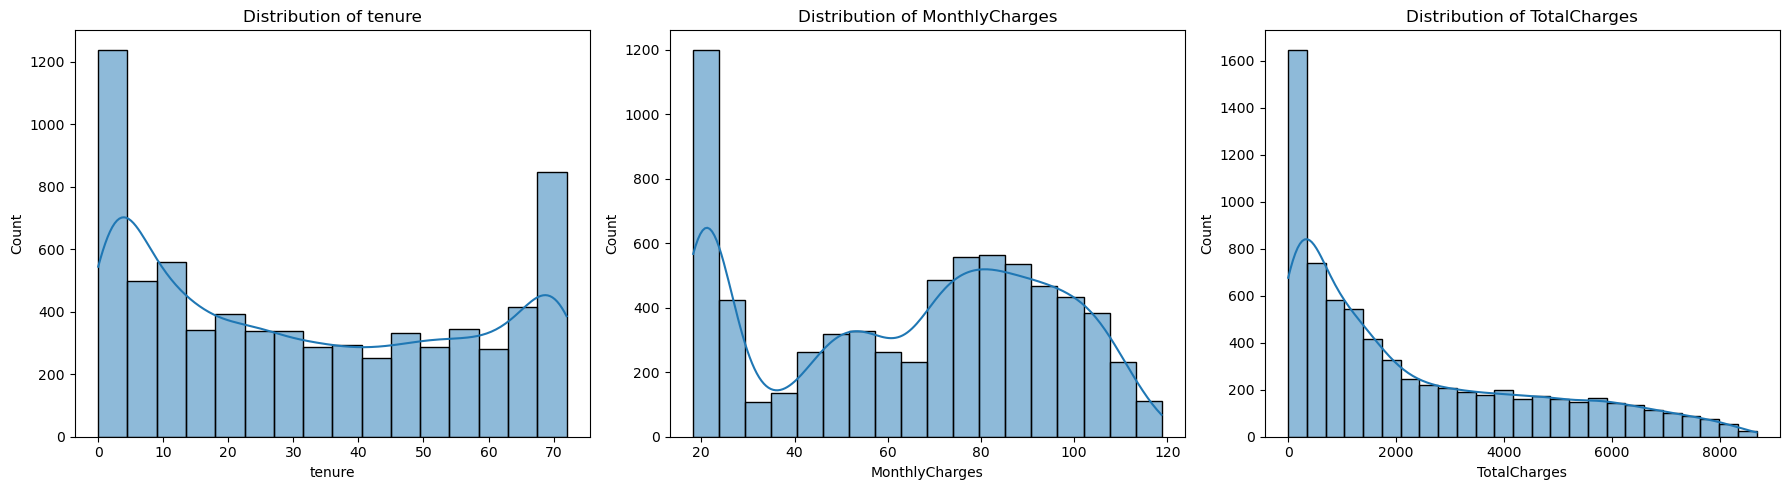

In [75]:
columns = ['tenure','MonthlyCharges', 'TotalCharges'] 

fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns):
    sns.histplot(
        data=df, 
        x=col, 
        kde=True,         
       ax=axs[i]
    )
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()

- MonthlyCharges show multimodal distribution while TotalCharges show right skewness.
- People who has used services for short period of time has churned in large rate.

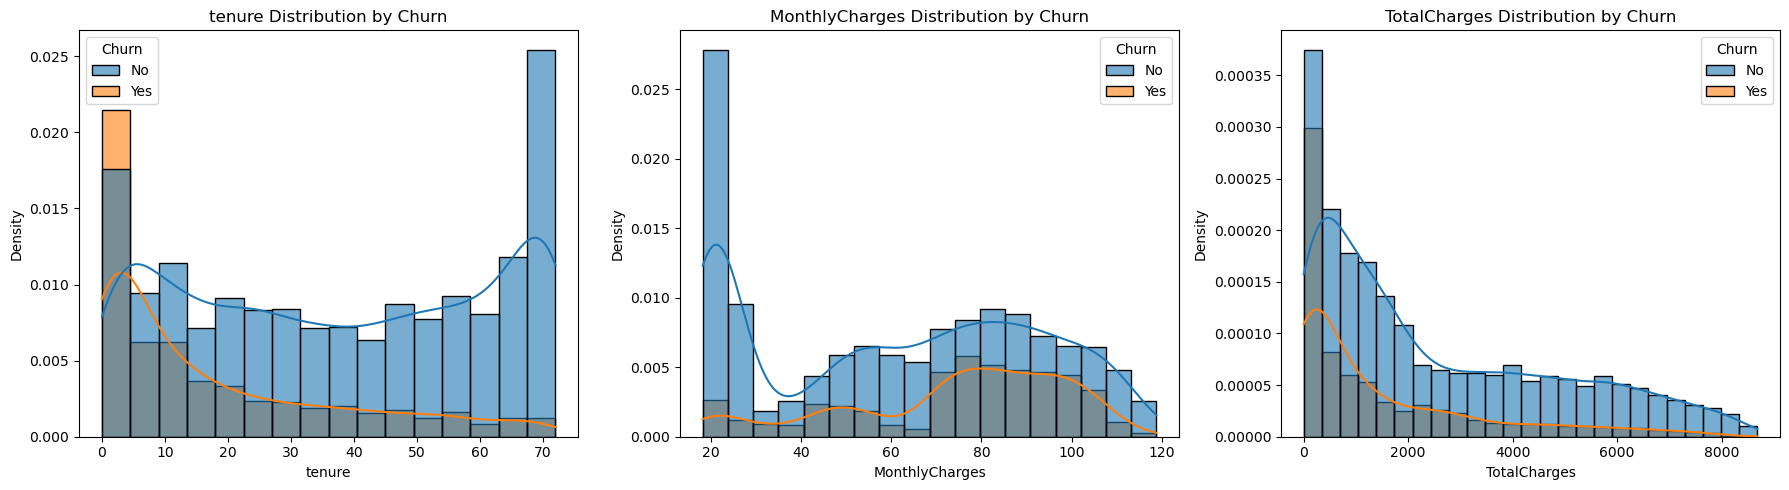

In [ ]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns):
    sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        hue='Churn',          
        stat='density',       # normalize distributions
        alpha=0.6,            # transparency for overlap
        ax=axs[i]
    )
    axs[i].set_title(f'{col} Distribution by Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')

plt.tight_layout()

- The customers with short tenure are more likely to churn.

<Figure size 500x300 with 0 Axes>

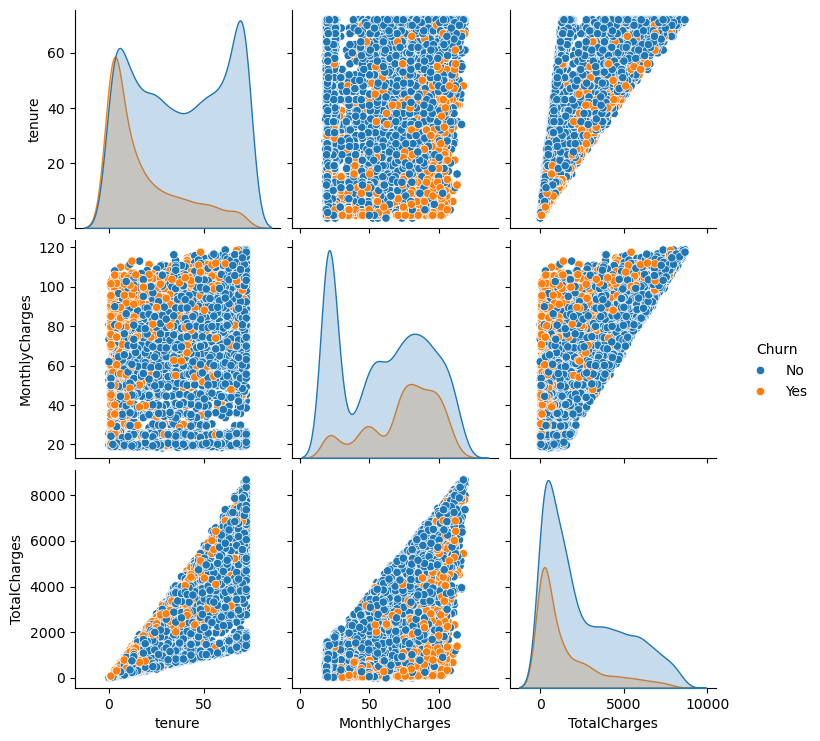

In [81]:
plt.figure(figsize=(5,3))
sns.pairplot(df,hue='Churn')

- tenure and monthly charges are correlated with totacharges.